In [17]:
import pandas as pd
import numpy as np

Prob = pd.Series([0.78,0.52,0.13,0.17,0.19,0.10,0.00,0.97,0.19,0.07,0.10,0.16,0.18,0.12,0.09,0.10])
GroundTruth = pd.Series([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
ROC_df = pd.DataFrame()
ROC_df.loc[:,'Olu'] = Prob
ROC_df.loc[:,'GT'] = GroundTruth
for thresh in np.arange(0.0,1.0,0.1):

    conditions = [ROC_df['GT'].eq(1) & (ROC_df['Olu'] > round(thresh,2)),\
                    ROC_df['GT'].eq(1) & (ROC_df['Olu'] <= round(thresh,2)),\
                    ROC_df['GT'].eq(0) & (ROC_df['Olu'] > round(thresh,2)),\
                    ROC_df['GT'].eq(0) & (ROC_df['Olu'] <= round(thresh,2))]
    choices = ['TP','FN','FP','TN']
    ROC_df[str(round(thresh,2))] = np.select(conditions, choices, default=0)

ROC_df

,Olu,GT,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.78,1,TP,TP,TP,TP,TP,TP,TP,TP,FN,FN
1,0.52,1,TP,TP,TP,TP,TP,TP,FN,FN,FN,FN
2,0.13,0,FP,FP,TN,TN,TN,TN,TN,TN,TN,TN
3,0.17,0,FP,FP,TN,TN,TN,TN,TN,TN,TN,TN
4,0.19,0,FP,FP,TN,TN,TN,TN,TN,TN,TN,TN
5,0.10,0,FP,TN,TN,TN,TN,TN,TN,TN,TN,TN
6,0.00,0,TN,TN,TN,TN,TN,TN,TN,TN,TN,TN
7,0.97,0,FP,FP,FP,FP,FP,FP,FP,FP,FP,FP
8,0.19,0,FP,FP,TN,TN,TN,TN,TN,TN,TN,TN
9,0.07,0,FP,TN,TN,TN,TN,TN,TN,TN,TN,TN


In [22]:
ROC_df_2 = pd.DataFrame(columns=['TP','FN','FP','TN'])
for thresh in np.arange(0.0,1.0,0.1):
    ROC_df_2.loc[str(round(thresh,2)),'TP'] = (ROC_df[str(round(thresh,2))].values == 'TP').sum()
    ROC_df_2.loc[str(round(thresh,2)),'FN'] = (ROC_df[str(round(thresh,2))].values == 'FN').sum()
    ROC_df_2.loc[str(round(thresh,2)),'FP'] = (ROC_df[str(round(thresh,2))].values == 'FP').sum()
    ROC_df_2.loc[str(round(thresh,2)),'TN'] = (ROC_df[str(round(thresh,2))].values == 'TN').sum()

    ROC_df_2.loc[str(round(thresh,2)),'TPR'] = (ROC_df_2.loc[str(round(thresh,2)),'TP'])/((ROC_df_2.loc[str(round(thresh,2)),'TP'])+(ROC_df_2.loc[str(round(thresh,2)),'FN']))
    ROC_df_2.loc[str(round(thresh,2)),'FNR'] = 1 - ROC_df_2.loc[str(round(thresh,2)),'TPR']
    ROC_df_2.loc[str(round(thresh,2)),'FPR'] = (ROC_df_2.loc[str(round(thresh,2)),'FP'])/((ROC_df_2.loc[str(round(thresh,2)),'FP'])+(ROC_df_2.loc[str(round(thresh,2)),'TN']))
    ROC_df_2.loc[str(round(thresh,2)),'TNR'] = 1 - ROC_df_2.loc[str(round(thresh,2)),'FPR']
ROC_df_2

,TP,FN,FP,TN,TPR,FNR,FPR,TNR
0.0,2,0,13,1,1.0,0.0,0.928571,0.071429
0.1,2,0,8,6,1.0,0.0,0.571429,0.428571
0.2,2,0,1,13,1.0,0.0,0.071429,0.928571
0.3,2,0,1,13,1.0,0.0,0.071429,0.928571
0.4,2,0,1,13,1.0,0.0,0.071429,0.928571
0.5,2,0,1,13,1.0,0.0,0.071429,0.928571
0.6,1,1,1,13,0.5,0.5,0.071429,0.928571
0.7,1,1,1,13,0.5,0.5,0.071429,0.928571
0.8,0,2,1,13,0.0,1.0,0.071429,0.928571
0.9,0,2,1,13,0.0,1.0,0.071429,0.928571


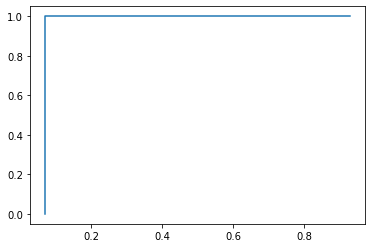

In [24]:
import matplotlib.pyplot as plt
plt.plot(ROC_df_2['FPR'],ROC_df_2['TPR'])

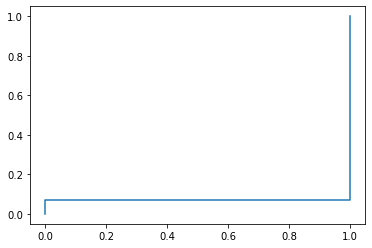

AUC: 0.07142857142857142


In [26]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(GroundTruth, Prob, pos_label=0)
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)